In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter, MonthLocator, YearLocator, DateFormatter

## Residential

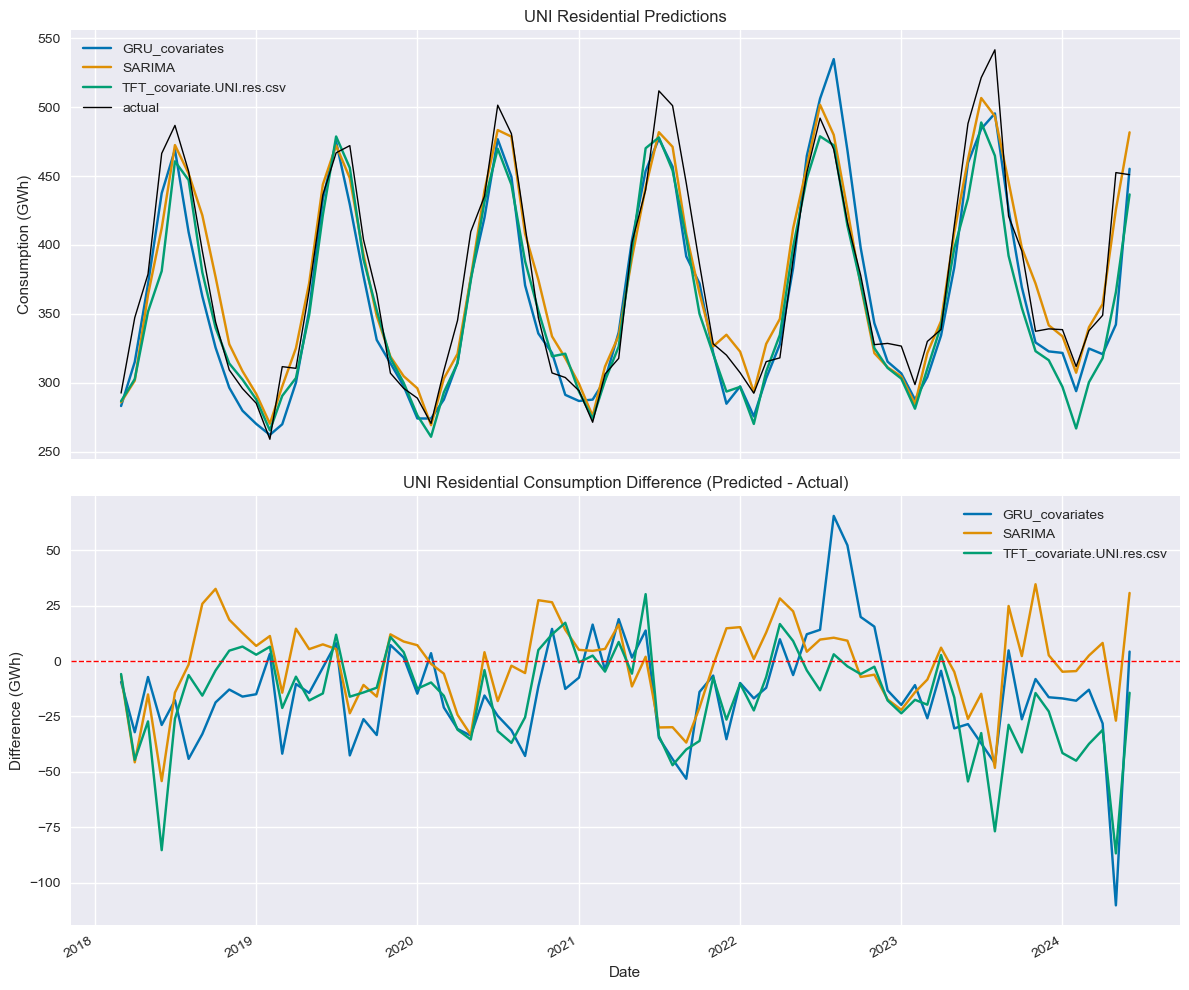

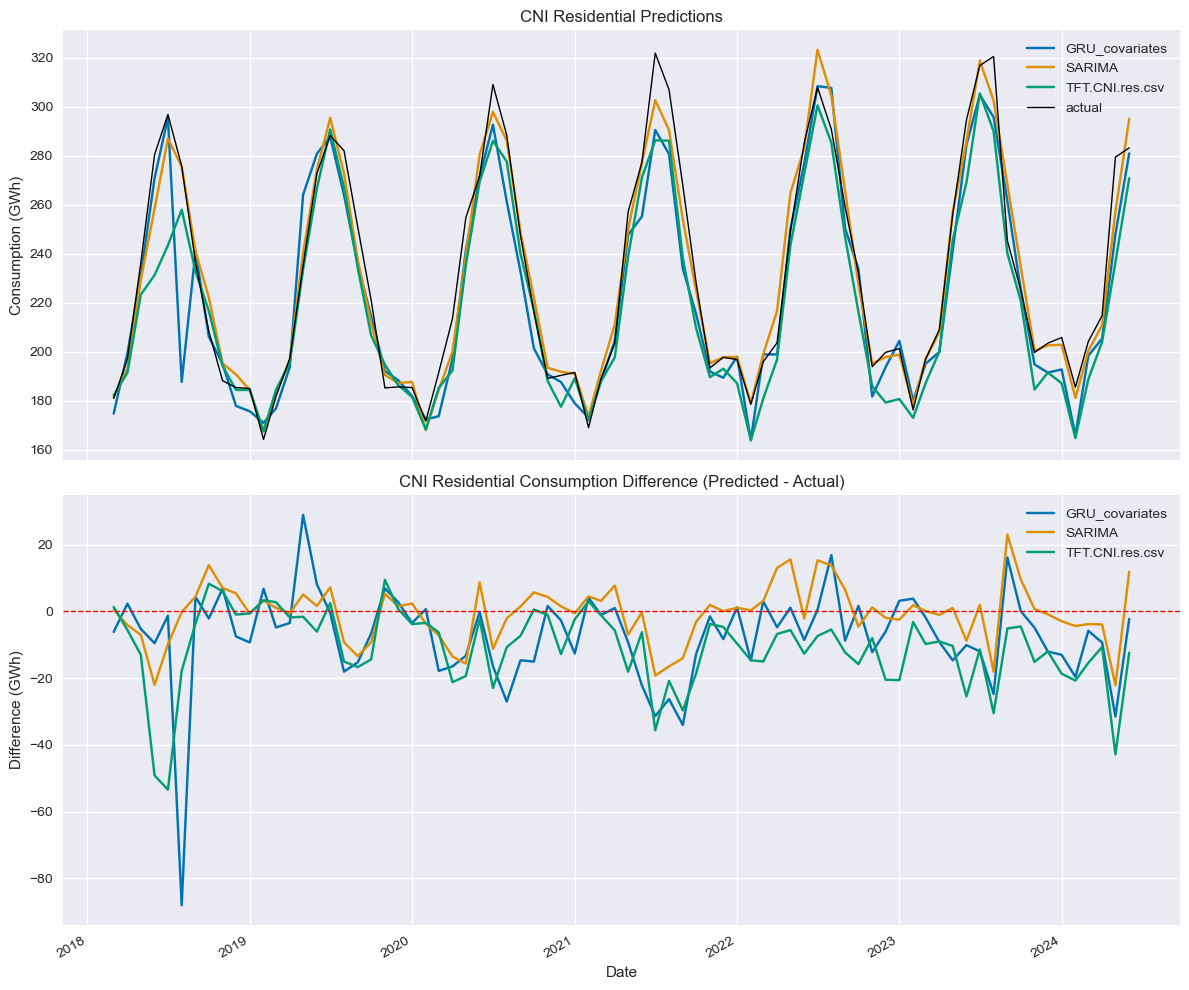

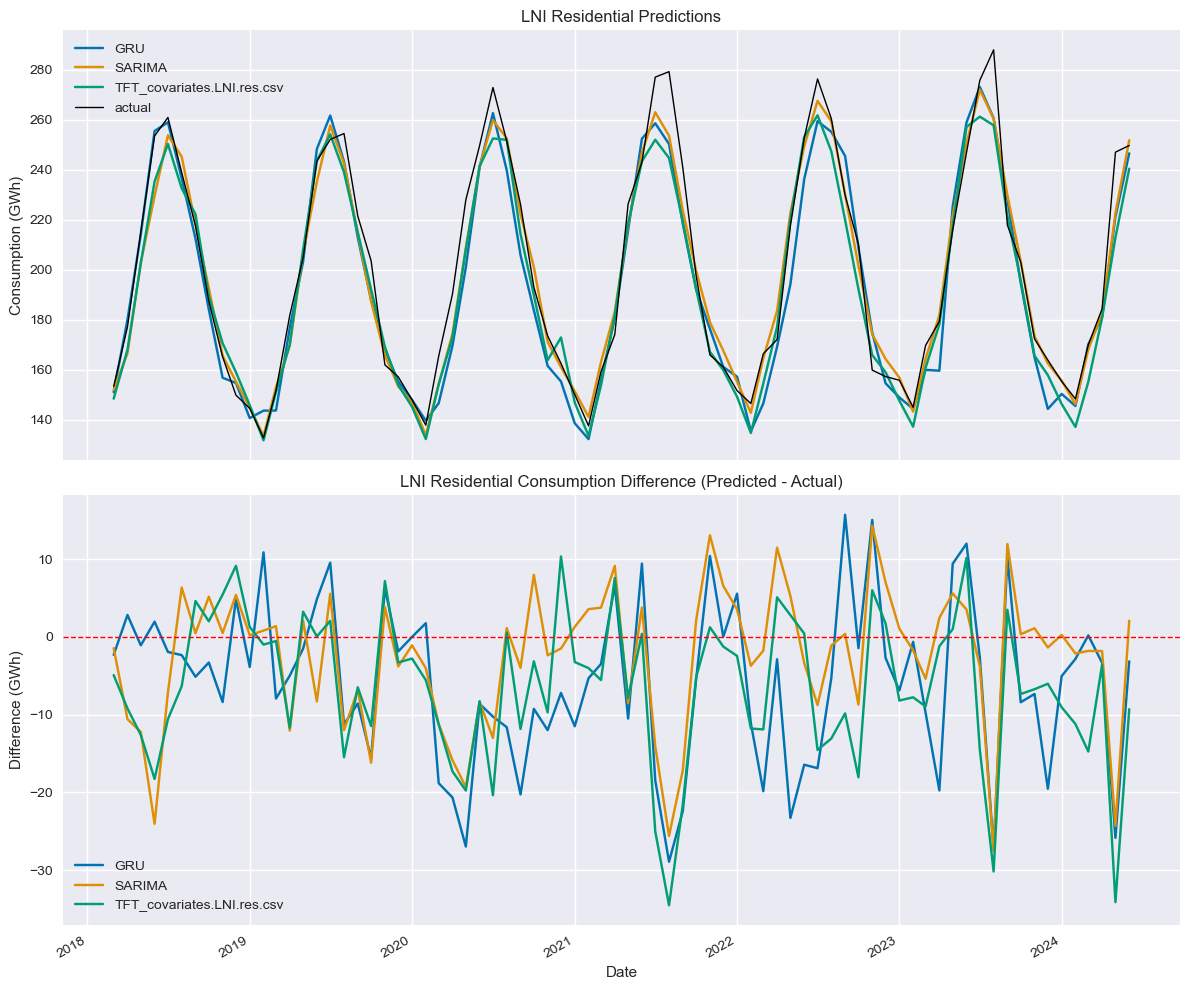

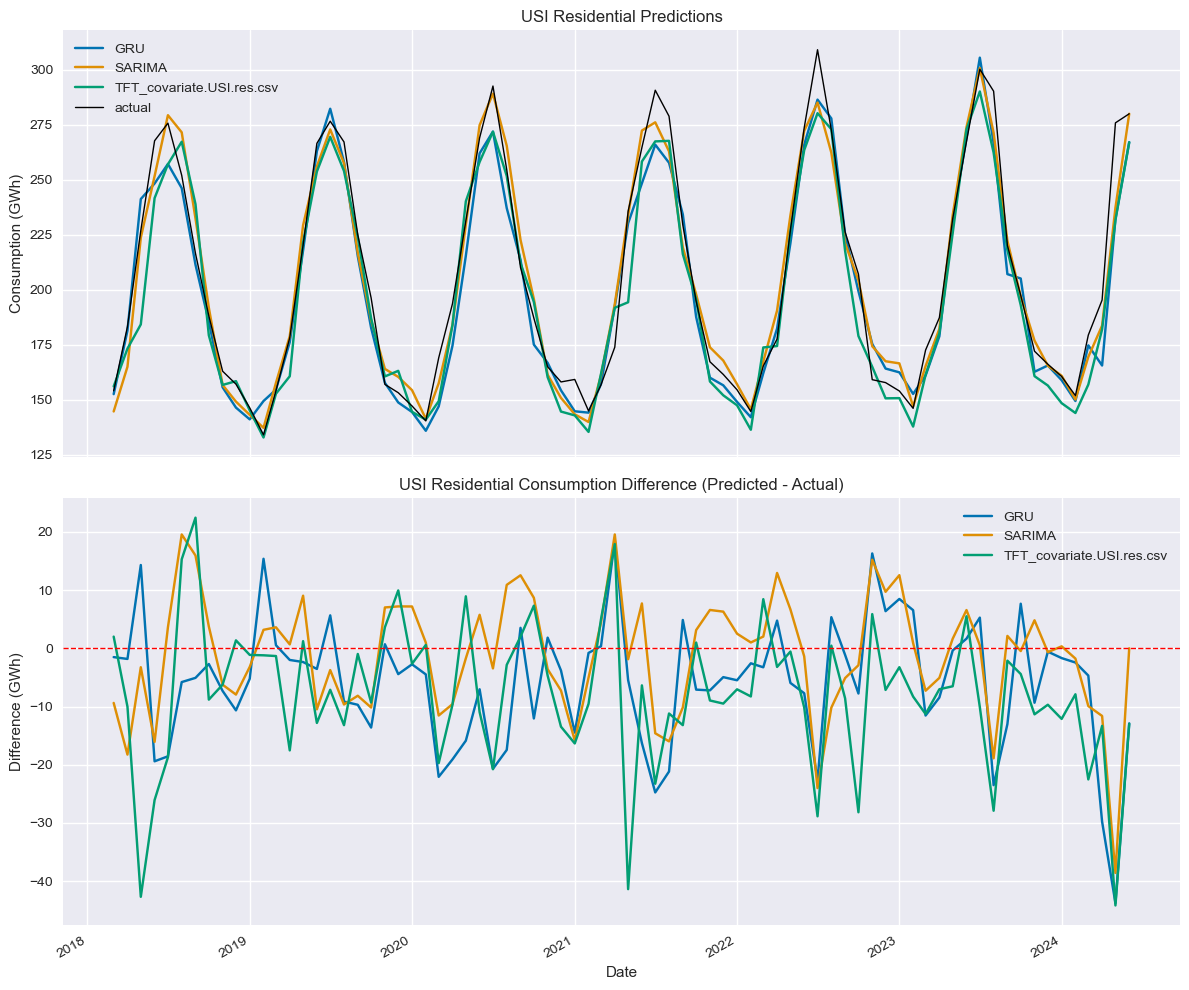

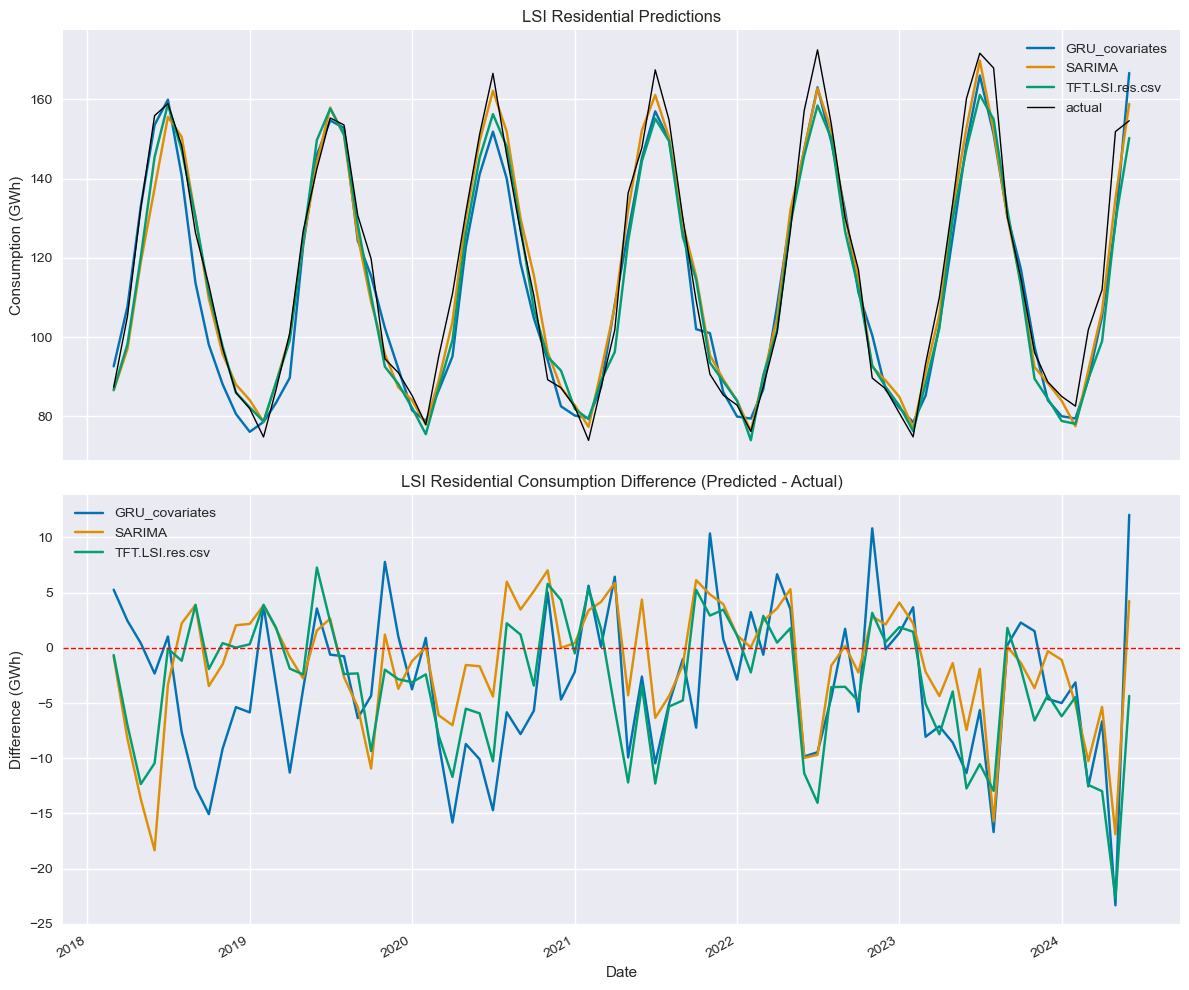

In [27]:
zones = ['uni', 'cni', 'lni', 'usi', 'lsi']

plt.style.use('seaborn-v0_8')
color_palette = sns.color_palette("colorblind", 10)

for zone in zones:
    directory = 'res/' + zone
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    for i, csv_file in enumerate(csv_files):
        file_path = os.path.join(directory, csv_file)
        model_params = csv_file.split(',')[0]
        df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
        color = color_palette[i % len(color_palette)]
        ax1.plot(df.index, df['predictions'], label=model_params, color=color)
        ax2.plot(df.index, df['difference'], label=model_params, color=color)
        if csv_file == csv_files[-1]:
            ax1.plot(df.index, df['actual'], label='actual', color='black', linewidth=1)
    ax1.set_title(zone.upper() + ' Residential Predictions')
    ax1.set_ylabel('Consumption (GWh)')
    ax1.legend()
    
    ax2.set_title(zone.upper() + ' Residential Consumption Difference (Predicted - Actual)')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Difference (GWh)')
    ax2.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    ax2.legend()
    
    fig.autofmt_xdate()
    
    # Use tight layout to prevent the labels from being cut off
    plt.tight_layout()
    
    # Show the plot
    plt.show()

## Business

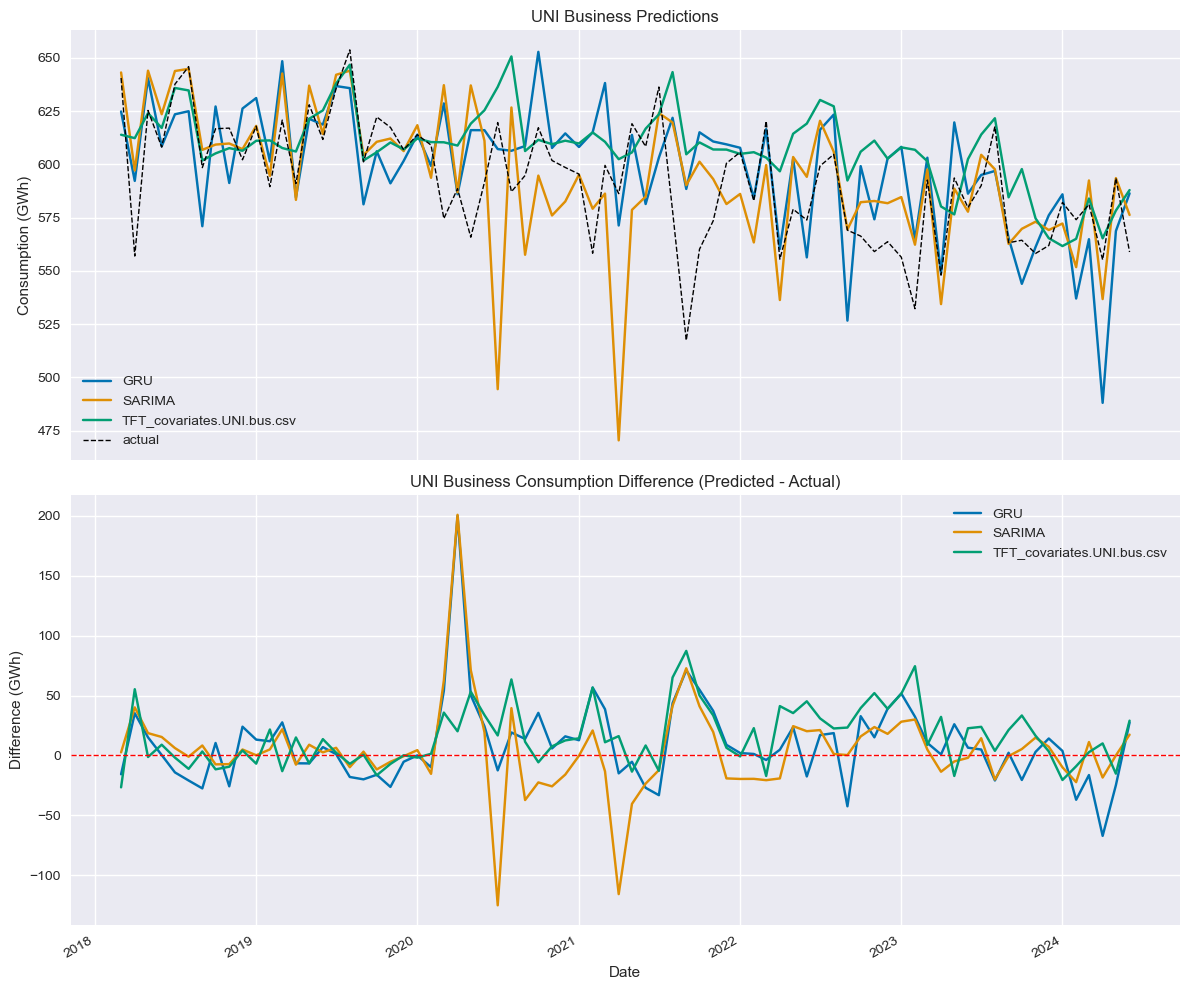

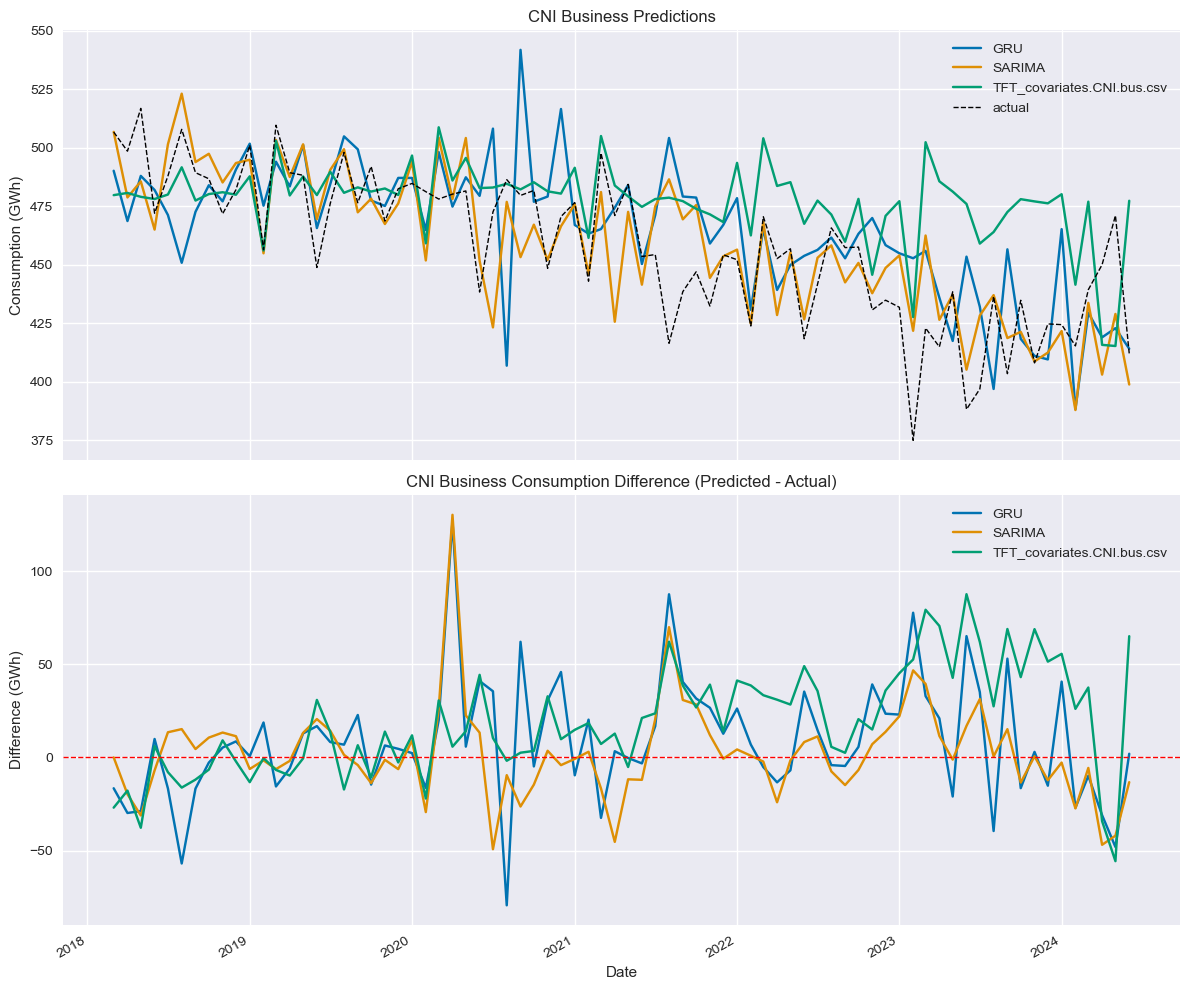

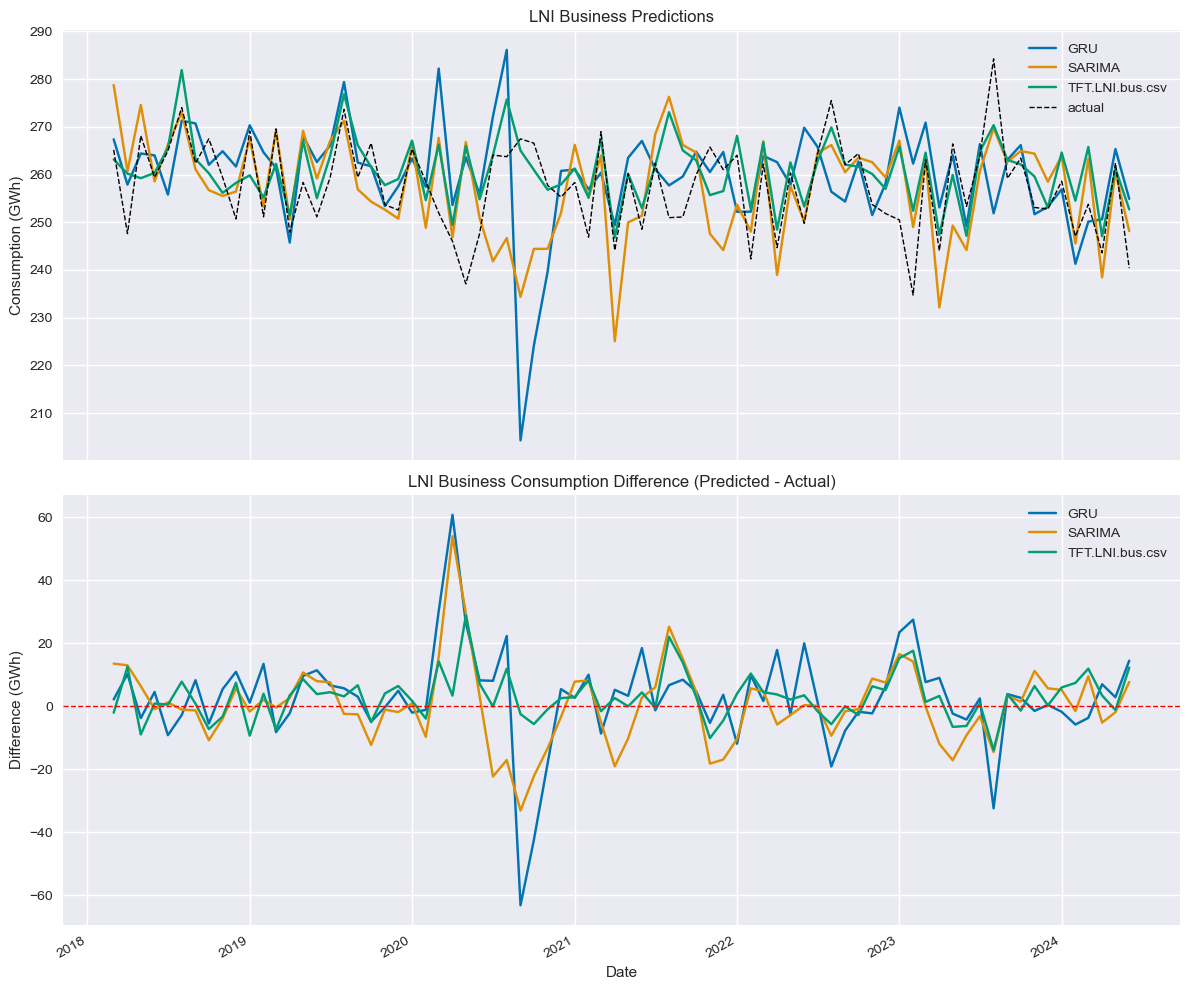

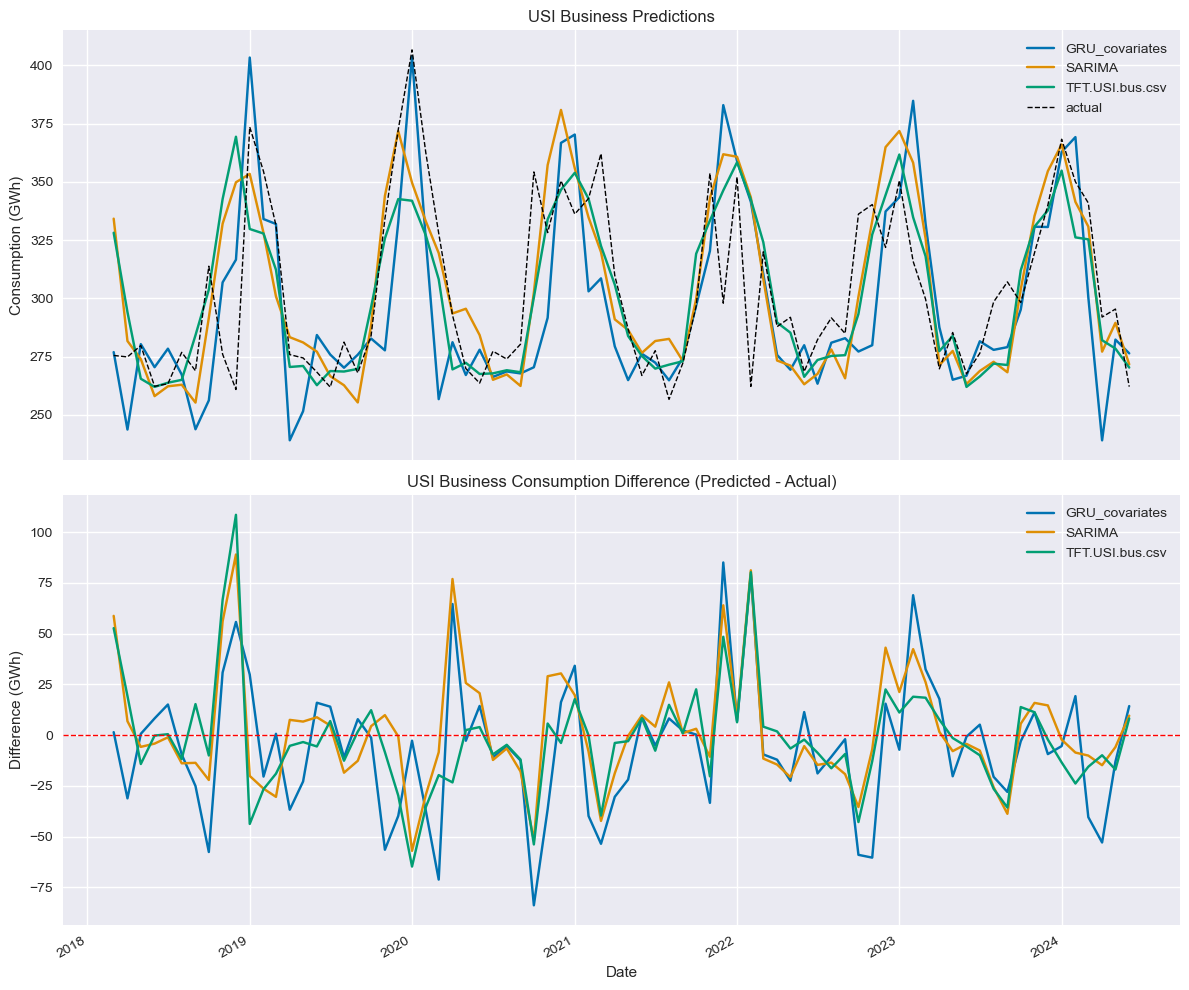

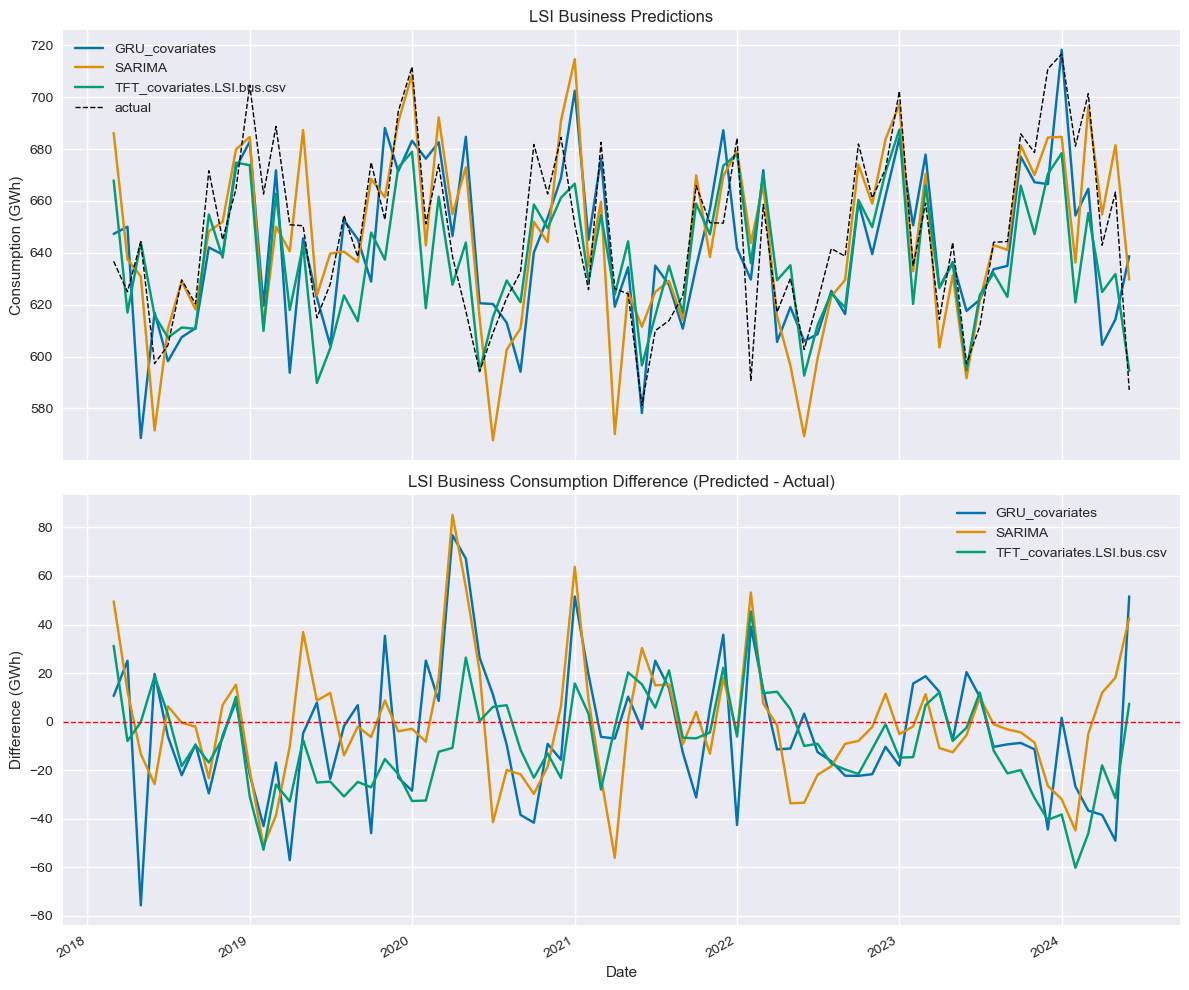

In [30]:
for zone in zones:
    directory = 'bus/' + zone
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    for i, csv_file in enumerate(csv_files):
        file_path = os.path.join(directory, csv_file)
        model_params = csv_file.split(',')[0]
        df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
        color = color_palette[i % len(color_palette)]
        ax1.plot(df.index, df['predictions'], label=model_params, color=color)
        ax2.plot(df.index, df['difference'], label=model_params, color=color)
        if csv_file == csv_files[-1]:
            ax1.plot(df.index, df['actual'], label='actual', color='black', linestyle='--', linewidth=1)
    ax1.set_title(zone.upper() + ' Business Predictions')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Consumption (GWh)')
    ax1.legend()
    
    ax2.set_title(zone.upper() + ' Business Consumption Difference (Predicted - Actual)')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Difference (GWh)')
    ax2.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    ax2.legend()
    
    fig.autofmt_xdate()
    
    # Use tight layout to prevent the labels from being cut off
    plt.tight_layout()
    
    # Show the plot
    plt.show()